# Customer Sentiment Analysis<br>
Tran Thi Kim Phung<br>
04 May 2025

<p align="center">
<strong> Statement of authorship </strong><br>
I have executed and prepared this project and document by myself <br>
Signed: Phung Tran<br><br>
</p>

# 1. Background

Amazon is the world's largest online retailer <br>
The company wants to know how satisfied users are after purchasing products on Amazon's website. The report provides detailed steps for the analyses to measure emotional attitude of customers and offers areas of improvements for sellers 

# 2. Objective

This analysis aims to provide the overall emotional attitude of customers and feedback summary for sellers to improve their shop. The context is set up as where customer feedback plays a crucial role in shaping customer trust, influencing purchasing decisions, and guiding sellers in refining their products and services.

The analysis will follow the four major sections:<br>
1. <br>
2.


# 3. Methods

## Import Library

In [1]:
from datasets import load_dataset 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from textblob import TextBlob
from transformers import pipeline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

## Import dataset

In [3]:
meta_beauty = load_dataset('McAuley-Lab/Amazon-Reviews-2023', 'raw_meta_All_Beauty')
reviews_beauty = load_dataset('McAuley-Lab/Amazon-Reviews-2023', 'raw_review_All_Beauty')

## Data cleaning & first exploration

### Meta beauty

In [5]:
meta_cols = ['title', 'average_rating', 'rating_number', 'features', 'description','price', 'store', 'parent_asin']
meta = meta_beauty['full'].to_pandas()
meta = meta[meta_cols]
meta.head(2)

,title,average_rating,rating_number,features,description,price,store,parent_asin
0,"Howard LC0008 Leather Conditioner, 8-Ounce (4-Pack)",4.8,10,[],[],None,Howard Products,B01CUPMQZE
1,"Yes to Tomatoes Detoxifying Charcoal Cleanser (Pack of 2) with Charcoal Powder, Tomato Fruit Extract, and Gingko Biloba Leaf Extract, 5 fl. oz.",4.5,3,[],[],None,Yes To,B076WQZGPM


In [6]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112590 entries, 0 to 112589
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           112590 non-null  object 
 1   average_rating  112590 non-null  float64
 2   rating_number   112590 non-null  int64  
 3   features        112590 non-null  object 
 4   description     112590 non-null  object 
 5   price           112590 non-null  object 
 6   store           101259 non-null  object 
 7   parent_asin     112590 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.9+ MB


In [7]:
meta.isnull().sum()

title                 0
average_rating        0
rating_number         0
features              0
description           0
price                 0
store             11331
parent_asin           0
dtype: int64

In [8]:
meta.dropna(inplace=True)

In [9]:
data_temp = meta.copy()

for col in data_temp.columns:
    if data_temp[col].apply(lambda x: isinstance(x, (list, np.ndarray, dict))).any():
        data_temp[col] = data_temp[col].astype(str)
    
data_temp.duplicated().sum()

np.int64(0)

<Axes: xlabel='average_rating', ylabel='Count'>

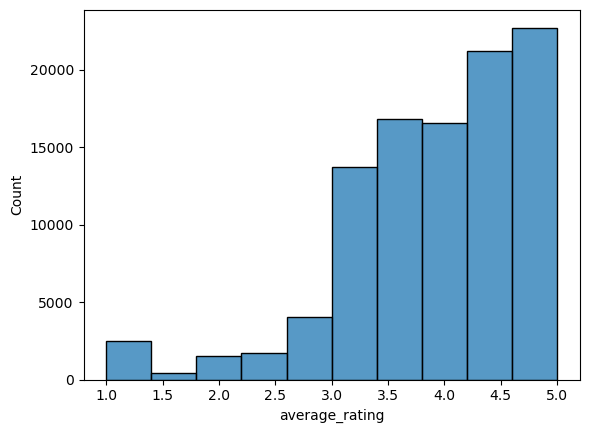

In [36]:
sns.histplot(meta['average_rating'], kde=False, bins=10)

(0.0, 100.0)

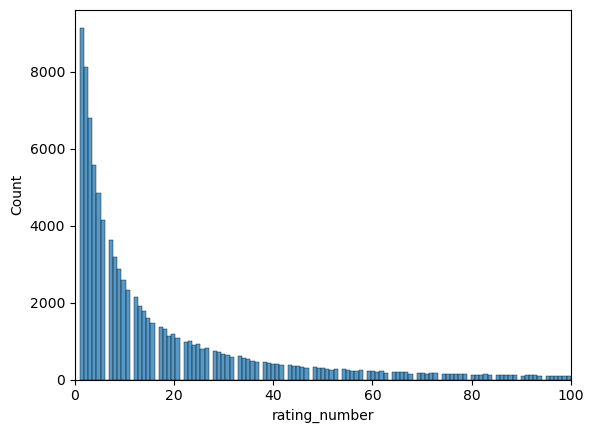

In [35]:
limit = 100
filtered_data = meta[meta['rating_number'] <= limit]
sns.histplot(filtered_data['rating_number'])
plt.xlim(0,limit)

### Review beauty

In [4]:
reviews_col = ['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']
reviews = reviews_beauty['full'].to_pandas()
reviews = reviews[reviews_col]
reviews.head(2)

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!",B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)",B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701528 entries, 0 to 701527
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   rating             701528 non-null  float64
 1   title              701528 non-null  object 
 2   text               701528 non-null  object 
 3   asin               701528 non-null  object 
 4   parent_asin        701528 non-null  object 
 5   user_id            701528 non-null  object 
 6   timestamp          701528 non-null  int64  
 7   helpful_vote       701528 non-null  int64  
 8   verified_purchase  701528 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 43.5+ MB


In [12]:
reviews.isnull().sum()

rating               0
title                0
text                 0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

In [13]:
reviews.duplicated().sum()

np.int64(7275)

In [6]:
reviews.drop_duplicates(inplace = True)

<Axes: xlabel='rating', ylabel='Count'>

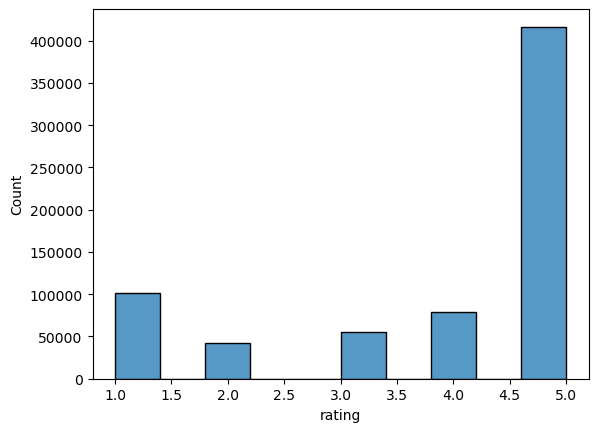

In [37]:
sns.histplot(reviews['rating'], kde=False, bins=10)

In [7]:
import torch

print(f"PyTorch version: {torch.__version__}")

# Kiểm tra MPS có được biên dịch vào PyTorch không
print(f"MPS built in: {hasattr(torch.backends, 'mps')}")

# Kiểm tra MPS có khả dụng không (nếu được biên dịch)
if hasattr(torch.backends, 'mps'):
    print(f"MPS available: {torch.backends.mps.is_available()}")
    print(f"MPS is built: {torch.backends.mps.is_built()}")

PyTorch version: 2.6.0
MPS built in: True
MPS available: False
MPS is built: True


In [ ]:
sentiment_analysis = pipeline("sentiment-analysis", model='cardiffnlp/twitter-xlm-roberta-base-sentiment', device=-1, max_length=256, truncation=True)

Device set to use cpu


In [20]:
def analyze_sentiment_transformers(text):
        if not isinstance(text, str) or pd.isna(text) or text.strip() == '':
            return None
        try:
            result = sentiment_analysis(text)
            return result[0]['label']
        except Exception as e:
            print(f"Error analyzing text: {e}")
            return None

### test with 1000 values

In [21]:
reviews_1000 =  reviews.head(1000)

In [16]:
reviews_1000['title_sentiment'] = reviews_1000['title'].apply(analyze_sentiment_transformers)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [22]:
reviews_1000 = reviews_1000.copy()
reviews_1000['text_sentiment'] = reviews_1000['text'].apply(analyze_sentiment_transformers)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [23]:
reviews_1000.head(20)

,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,text_sentiment
0,5.0,Such a lovely scent but not overpowering.,"This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!",B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,positive
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just wish it was odorless or had a soft coconut smell. Having my head smell like an orange coffee is offputting. (granted, I did know the smell was described but I was hoping it would be light)",B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,negative
2,5.0,Yes!,"Smells good, feels great!",B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True,positive
3,1.0,Synthetic feeling,Felt synthetic,B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True,negative
4,5.0,A+,Love it,B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True,positive
5,4.0,Pretty Color,The polish was quiet thick and did not apply smoothly. I let dry overnight before adding a second coat since it was so thick.,B00R8DXL44,B00R8DXL44,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,1598567408138,0,True,negative
6,5.0,Handy,"Great for many tasks. I purchased these for makeup removal. No makeup on your washcloths. Disposable, so great for travel. Soft. Absorbant.",B099DRHW5V,B099DRHW5V,AHREXOGQPZDA6354MHH4ETSF3MCQ,1631885519443,0,True,positive
7,3.0,Meh,These were lightweight and soft but much too small for my liking. I would have preferred two of these together to make one loc. For that reason I will not be repurchasing.,B088SZDGXG,B08BBQ29N5,AEYORY2AVPMCPDV57CE337YU5LXA,1634275259292,0,True,negative
8,5.0,Great for at home use and so easy to use!,This is perfect for my between salon visits. I have been using this now twice a week for over a month and I absolutely love it! My skin looks amazing and feels super smooth and silky. This is also super easy to use (just follow instructions). I can see already that I will begin expanding the time between visits which will definitely help me save money in the long run. Highly recommend!,B08P2DZB4X,B08P2DZB4X,AFSKPY37N3C43SOI5IEXEK5JSIYA,1627391044559,0,False,positive
9,5.0,Nice shampoo for the money,"I get Keratin treatments at the salon at least 3-4 times a year (would do it more often if I could afford it). I am always in the market to use products that can help extend my salon visits. This Keratin shampoo is really nice. It is sulfate free (which is the first thing I look for ) and makes my hair feel silky smooth and soft. I highly recommend for anyone who wants to improve the texture and appearance of your hair. I really like the fragrance, too.",B086QY6T7N,B086QY6T7N,AFSKPY37N3C43SOI5IEXEK5JSIYA,1626614511145,0,False,positive


In [ ]:
# define numerical and categorical columns

In [ ]:
# numberical: distribution, boxplot: rating, rating_number, len(title, details)

In [ ]:
# categorical: # unique values of categories

In [ ]:
# Rating thấp thường complain về gì?
# Rating cao thường khen là gì?

In [ ]:
# đánh giá cảm xúc comments
# đánh giá customer review 

# 4. Key Findings

# 5. Conclusions